## Flight Turbine Damage Prediction 
    - Author: Nirbhay Worlikar

Let us first start with importing required python libraries

In [1]:
#Import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling as pstats
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


warnings.filterwarnings(action='ignore')


Reading data from local storage to Dataframe using pandas read_excel function.

In [2]:
# Reading file in a dataframe

data = pd.read_excel("EngineHealthMonitoringData.xlsx")
data.head()


,Flight Phase,Engine Serial Number,Operator,Time / seconds,Temperature / Degrees,Predicted Part Damage / mm,Actual Part Damage / mm
0,FlightPhaseEnum.taxiout,11101,ABC,0.000000,727.190125,NaN,NaN
1,FlightPhaseEnum.taxiout,11101,ABC,944.000000,727.190125,NaN,NaN
2,FlightPhaseEnum.takeoff,11101,ABC,949.000000,916.815519,NaN,NaN
3,FlightPhaseEnum.takeoff,11101,ABC,973.776886,921.807580,NaN,NaN
4,FlightPhaseEnum.takeoff,11101,ABC,980.000000,924.630174,NaN,NaN


In [3]:
# Understanding dataframe data ()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flight Phase                 95 non-null     object 
 1   Engine Serial Number         95 non-null     int64  
 2   Operator                     95 non-null     object 
 3   Time / seconds               95 non-null     float64
 4   Temperature / Degrees        94 non-null     float64
 5   Predicted Part Damage  / mm  5 non-null      float64
 6   Actual Part Damage / mm      5 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.3+ KB
None


We can see that the data has lot of inconsistency. There are total of 95 entries and the given data also contains some missing values. We therefore need to process the data and clean it.

In [4]:
data_prepare = data


## Preprocess And Cleaning


We have values given for Operators ABC as 1 and DEF as 1.1. So lets impute them in a new column 'OperatorFactor'.

In [5]:
# fill operatorfactor value as: ABC=1 and DEF=1.1

data_prepare.loc[data_prepare.Operator == 'ABC', 'OperatorFactor'] = 1
data_prepare.loc[data_prepare.Operator == 'DEF', 'OperatorFactor'] = 1.1

data_prepare.head()


,Flight Phase,Engine Serial Number,Operator,Time / seconds,Temperature / Degrees,Predicted Part Damage / mm,Actual Part Damage / mm,OperatorFactor
0,FlightPhaseEnum.taxiout,11101,ABC,0.000000,727.190125,NaN,NaN,1.0
1,FlightPhaseEnum.taxiout,11101,ABC,944.000000,727.190125,NaN,NaN,1.0
2,FlightPhaseEnum.takeoff,11101,ABC,949.000000,916.815519,NaN,NaN,1.0
3,FlightPhaseEnum.takeoff,11101,ABC,973.776886,921.807580,NaN,NaN,1.0
4,FlightPhaseEnum.takeoff,11101,ABC,980.000000,924.630174,NaN,NaN,1.0


In [6]:
df = data_prepare


There are some zero values in column 'Time / seconds'. Lets try to fill the zero values with the mean of time bby grouping FlightPhase, EngineSerialNumber and Operator

In [7]:
# Handle zero values in Time.

df['Time / seconds'] = df.groupby(['Flight Phase', 'Engine Serial Number', 'Operator'],
                                    sort=False)['Time / seconds'].apply(lambda x: x.replace(0.000000, x.mean()))

df.head(50)


,Flight Phase,Engine Serial Number,Operator,Time / seconds,Temperature / Degrees,Predicted Part Damage / mm,Actual Part Damage / mm,OperatorFactor
0,FlightPhaseEnum.taxiout,11101,ABC,472.000000,727.190125,NaN,NaN,1.0
1,FlightPhaseEnum.taxiout,11101,ABC,944.000000,727.190125,NaN,NaN,1.0
2,FlightPhaseEnum.takeoff,11101,ABC,949.000000,916.815519,NaN,NaN,1.0
3,FlightPhaseEnum.takeoff,11101,ABC,973.776886,921.807580,NaN,NaN,1.0
4,FlightPhaseEnum.takeoff,11101,ABC,980.000000,924.630174,NaN,NaN,1.0
5,FlightPhaseEnum.takeoff,11101,ABC,996.001000,935.805692,NaN,NaN,1.0
6,FlightPhaseEnum.takeoff,11101,ABC,1108.000000,935.805692,NaN,NaN,1.0
7,FlightPhaseEnum.climb,11101,ABC,1113.000000,882.757830,0.003407,0.003507,1.0
8,FlightPhaseEnum.climb,11101,ABC,1270.000000,902.854711,NaN,NaN,1.0
9,FlightPhaseEnum.climb,11101,ABC,1478.000000,909.088819,NaN,NaN,1.0


Similarly we will fill the missing value in column 'Temperature / Degrees' by grouping and filling mean value of that group and putting it into new column named as 'Temperature / Degrees Fixed'.

In [8]:
# Creating group of Flight Phase, EngineNumber and Operator so we can fill the missing value with the mean value accordingly.

df['Temperature / Degrees Fixed'] = df.groupby(['Flight Phase', 'Engine Serial Number', 'Operator'],
                                                               sort=False)['Temperature / Degrees'].apply(lambda x: x.fillna(x.mean()))

df.head(50)


,Flight Phase,Engine Serial Number,Operator,Time / seconds,Temperature / Degrees,Predicted Part Damage / mm,Actual Part Damage / mm,OperatorFactor,Temperature / Degrees Fixed
0,FlightPhaseEnum.taxiout,11101,ABC,472.000000,727.190125,NaN,NaN,1.0,727.190125
1,FlightPhaseEnum.taxiout,11101,ABC,944.000000,727.190125,NaN,NaN,1.0,727.190125
2,FlightPhaseEnum.takeoff,11101,ABC,949.000000,916.815519,NaN,NaN,1.0,916.815519
3,FlightPhaseEnum.takeoff,11101,ABC,973.776886,921.807580,NaN,NaN,1.0,921.807580
4,FlightPhaseEnum.takeoff,11101,ABC,980.000000,924.630174,NaN,NaN,1.0,924.630174
5,FlightPhaseEnum.takeoff,11101,ABC,996.001000,935.805692,NaN,NaN,1.0,935.805692
6,FlightPhaseEnum.takeoff,11101,ABC,1108.000000,935.805692,NaN,NaN,1.0,935.805692
7,FlightPhaseEnum.climb,11101,ABC,1113.000000,882.757830,0.003407,0.003507,1.0,882.757830
8,FlightPhaseEnum.climb,11101,ABC,1270.000000,902.854711,NaN,NaN,1.0,902.854711
9,FlightPhaseEnum.climb,11101,ABC,1478.000000,909.088819,NaN,NaN,1.0,909.088819


In [9]:
df.columns

Index(['Flight Phase', 'Engine Serial Number', 'Operator', 'Time / seconds',
       'Temperature / Degrees', 'Predicted Part Damage  / mm',
       'Actual Part Damage / mm', 'OperatorFactor',
       'Temperature / Degrees Fixed'],
      dtype='object')

Now we need to calculate Damage with the given formula and hence we need Average temperature value for each Engine and for every Flight Phase.

In [10]:
# calculating average temperature value by grouping Engine number and Flight Phase

avg_temp= pd.DataFrame(df.groupby(['Engine Serial Number','Flight Phase'], sort=False)['Temperature / Degrees Fixed'].mean().reset_index())

avg_temp.rename(columns={'Temperature / Degrees Fixed': 'Avg_Temperature',
                         }, inplace=True)
avg_temp.head(50)


,Engine Serial Number,Flight Phase,Avg_Temperature
0,11101,FlightPhaseEnum.taxiout,727.190125
1,11101,FlightPhaseEnum.takeoff,926.972932
2,11101,FlightPhaseEnum.climb,870.777901
3,11101,FlightPhaseEnum.cruise,789.233853
4,11102,FlightPhaseEnum.taxiout,736.910918
5,11102,FlightPhaseEnum.takeoff,937.350926
6,11102,FlightPhaseEnum.climb,875.077487
7,11102,FlightPhaseEnum.cruise,823.374563
8,11103,FlightPhaseEnum.taxiout,729.184132
9,11103,FlightPhaseEnum.takeoff,898.043377


We got average temperature for each engine and its flight phase. Now we need to merge the average_temperature column with our main data

In [11]:
# Merging average values from the group

df = pd.merge(df, avg_temp, on=['Engine Serial Number', 'Flight Phase'])

df.head(50)

,Flight Phase,Engine Serial Number,Operator,Time / seconds,Temperature / Degrees,Predicted Part Damage / mm,Actual Part Damage / mm,OperatorFactor,Temperature / Degrees Fixed,Avg_Temperature
0,FlightPhaseEnum.taxiout,11101,ABC,472.000000,727.190125,NaN,NaN,1.0,727.190125,727.190125
1,FlightPhaseEnum.taxiout,11101,ABC,944.000000,727.190125,NaN,NaN,1.0,727.190125,727.190125
2,FlightPhaseEnum.takeoff,11101,ABC,949.000000,916.815519,NaN,NaN,1.0,916.815519,926.972932
3,FlightPhaseEnum.takeoff,11101,ABC,973.776886,921.807580,NaN,NaN,1.0,921.807580,926.972932
4,FlightPhaseEnum.takeoff,11101,ABC,980.000000,924.630174,NaN,NaN,1.0,924.630174,926.972932
5,FlightPhaseEnum.takeoff,11101,ABC,996.001000,935.805692,NaN,NaN,1.0,935.805692,926.972932
6,FlightPhaseEnum.takeoff,11101,ABC,1108.000000,935.805692,NaN,NaN,1.0,935.805692,926.972932
7,FlightPhaseEnum.climb,11101,ABC,1113.000000,882.757830,0.003407,0.003507,1.0,882.757830,870.777901
8,FlightPhaseEnum.climb,11101,ABC,1270.000000,902.854711,NaN,NaN,1.0,902.854711,870.777901
9,FlightPhaseEnum.climb,11101,ABC,1478.000000,909.088819,NaN,NaN,1.0,909.088819,870.777901


Lets impute the variables in the equation given to calculate the damage value as:


Dammage = OperatorFactor * (1.2E-11) * (Average Temperature ^ 2.88)


Here, the formula given had specified "Average temperature for climb" but Assuming if we could calculate damage of all phases by using respective average temperatures. Therefore in below implementation we have considered Average Temperature of all phases respectively.

In [12]:
# Calculating Actual Damage Value with given formula

df['Damage_Calculated'] = df['OperatorFactor']*(1.2E-11)*(df['Avg_Temperature']**2.88)
print(df.shape)
df.head(100)

(95, 11)


,Flight Phase,Engine Serial Number,Operator,Time / seconds,Temperature / Degrees,Predicted Part Damage / mm,Actual Part Damage / mm,OperatorFactor,Temperature / Degrees Fixed,Avg_Temperature,Damage_Calculated
0,FlightPhaseEnum.taxiout,11101,ABC,472.000000,727.190125,NaN,NaN,1.0,727.190125,727.190125,0.002093
1,FlightPhaseEnum.taxiout,11101,ABC,944.000000,727.190125,NaN,NaN,1.0,727.190125,727.190125,0.002093
2,FlightPhaseEnum.takeoff,11101,ABC,949.000000,916.815519,NaN,NaN,1.0,916.815519,926.972932,0.004211
3,FlightPhaseEnum.takeoff,11101,ABC,973.776886,921.807580,NaN,NaN,1.0,921.807580,926.972932,0.004211
4,FlightPhaseEnum.takeoff,11101,ABC,980.000000,924.630174,NaN,NaN,1.0,924.630174,926.972932,0.004211
...,...,...,...,...,...,...,...,...,...,...,...
90,FlightPhaseEnum.climb,11105,ABC,2161.000000,818.224388,NaN,NaN,1.0,818.224388,814.389669,0.002900
91,FlightPhaseEnum.climb,11105,ABC,2507.551163,814.897915,NaN,NaN,1.0,814.897915,814.389669,0.002900
92,FlightPhaseEnum.cruise,11105,ABC,2512.551163,771.389284,NaN,NaN,1.0,771.389284,771.360716,0.002480
93,FlightPhaseEnum.cruise,11105,ABC,8276.000000,771.346432,NaN,NaN,1.0,771.346432,771.360716,0.002480


In [13]:
df.columns

Index(['Flight Phase', 'Engine Serial Number', 'Operator', 'Time / seconds',
       'Temperature / Degrees', 'Predicted Part Damage  / mm',
       'Actual Part Damage / mm', 'OperatorFactor',
       'Temperature / Degrees Fixed', 'Avg_Temperature', 'Damage_Calculated'],
      dtype='object')

We select the columns we will use as Features for our prediction. For simplicity and ease of implmentation, lets rename some columns

In [14]:
# Feature Selection for prediction

data_pred = df.drop(['Operator','Predicted Part Damage  / mm','Actual Part Damage / mm','Temperature / Degrees','Avg_Temperature'], axis=1)

data_pred.rename(columns={"Flight Phase": "Flight_Phase", "Engine Serial Number": "Engine_Serial_Number", "Time / seconds":"T_sec", "Temperature / Degrees Fixed":"Temperature",} ,inplace=True)

print(data_pred.shape)
data_pred.head()

(95, 6)


,Flight_Phase,Engine_Serial_Number,T_sec,OperatorFactor,Temperature,Damage_Calculated
0,FlightPhaseEnum.taxiout,11101,472.000000,1.0,727.190125,0.002093
1,FlightPhaseEnum.taxiout,11101,944.000000,1.0,727.190125,0.002093
2,FlightPhaseEnum.takeoff,11101,949.000000,1.0,916.815519,0.004211
3,FlightPhaseEnum.takeoff,11101,973.776886,1.0,921.807580,0.004211
4,FlightPhaseEnum.takeoff,11101,980.000000,1.0,924.630174,0.004211


In [15]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Flight_Phase          95 non-null     object 
 1   Engine_Serial_Number  95 non-null     int64  
 2   T_sec                 95 non-null     float64
 3   OperatorFactor        95 non-null     float64
 4   Temperature           95 non-null     float64
 5   Damage_Calculated     95 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.2+ KB


After entire data pre-processing and cleaning we have no null values. This data we will use further for our prediction. But before predicition let us understand more about the data and their interdependencies. We can do that by generating an report using pandas profiling tool.

In [16]:
# Basic EDA
pstats.ProfileReport(data_pred)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


From the data above report we can see that there is a correlation present between Temperature and Damage_Calculated values. Lets plot and understand it.

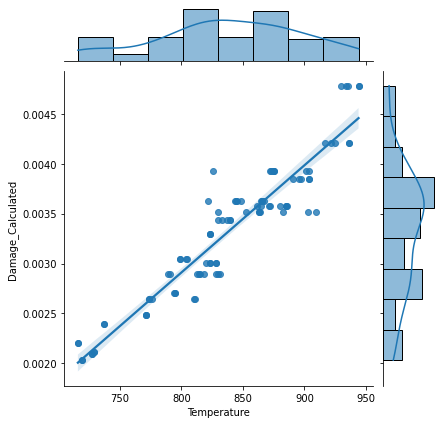

In [19]:
# Linear relationship with temperature and Damage Calculated
 
sns.jointplot(data=data_pred, x="Temperature", y="Damage_Calculated", kind="reg")

We can see the data is linear in nature and hence we can use this for our prediction.

-----

## Prediction of Damage

In [20]:
df1 = data_pred

We can see a Correlation between all the columns using a pairplot.

<Figure size 1152x1152 with 0 Axes>

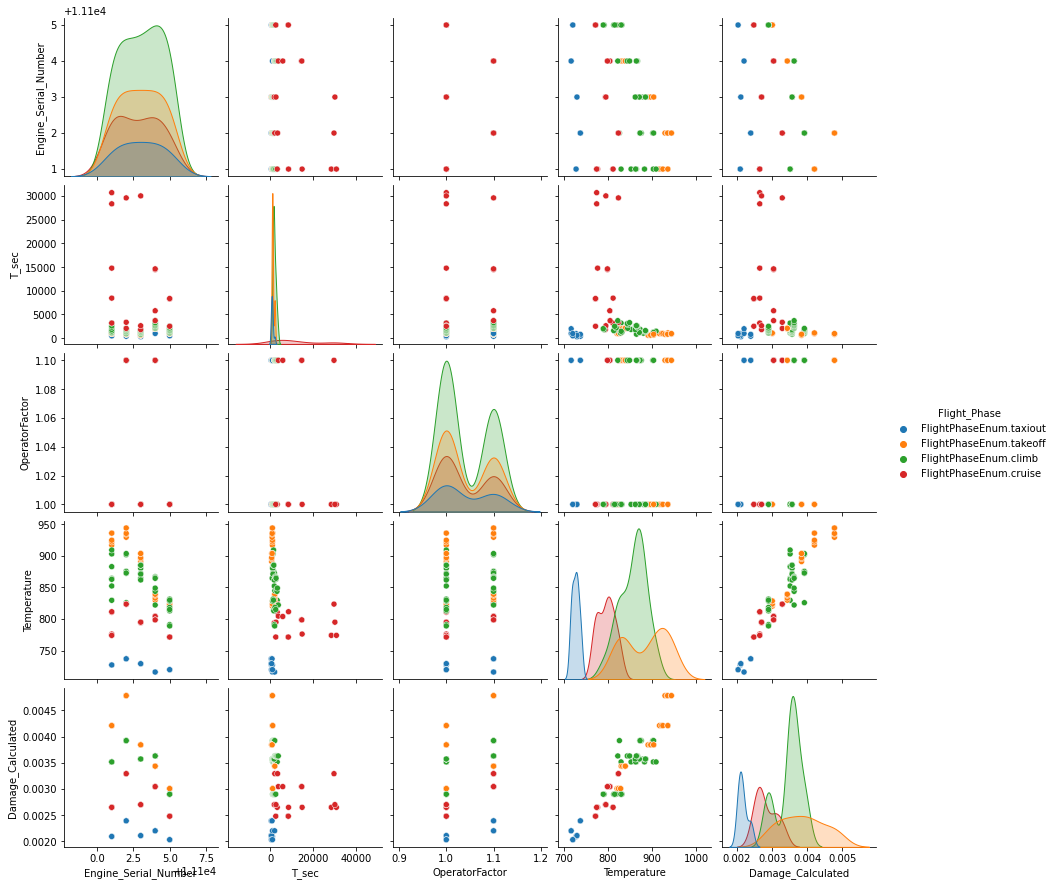

In [21]:
plt.figure(figsize=(16,16))
sns.pairplot(df1, hue='Flight_Phase')
plt.show()

In the above plot we can see that the data in column T_sec needs to be transformed

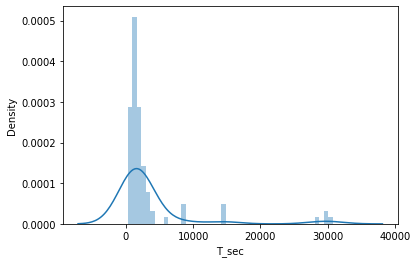

In [22]:
t = df1['T_sec']

ax = sns.distplot(t)

performing Log transform to bring data into normal or near to normal distribution and ploting pairplot again to see correlation.

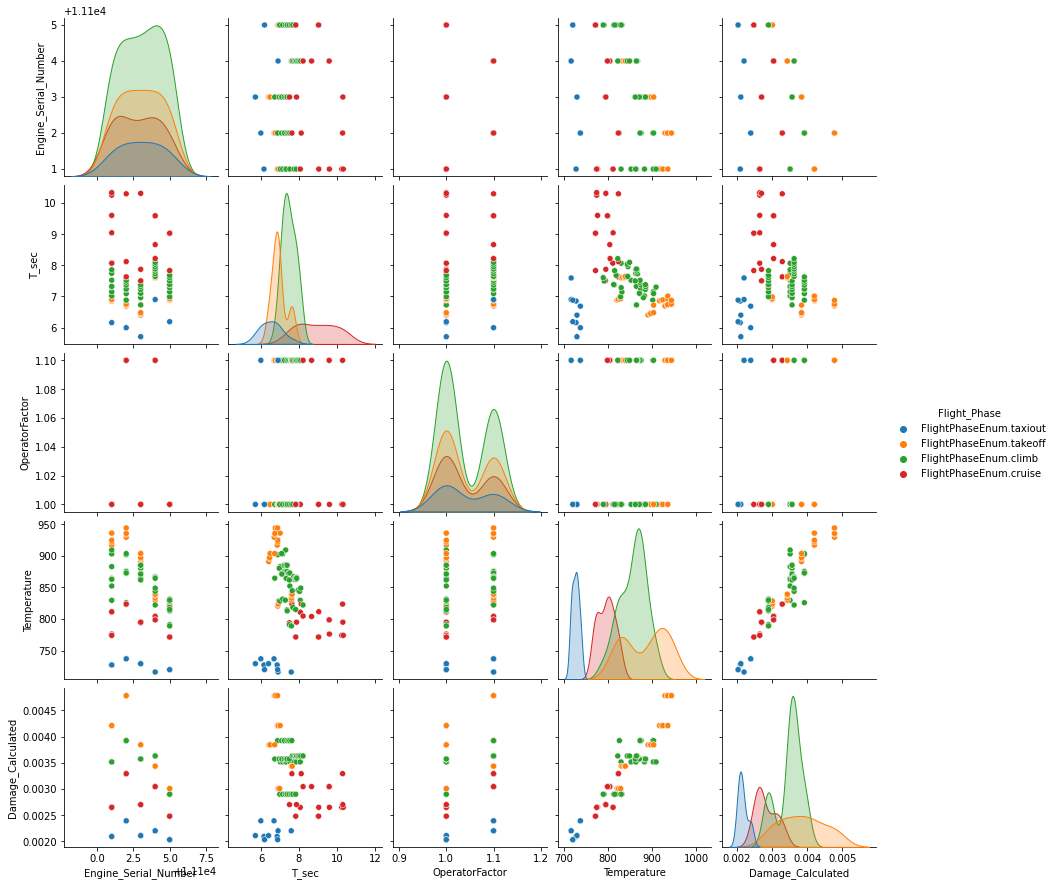

In [23]:
#Perform Log transformation to bring data into normal or near normal distribution
df1['T_sec'] = df1['T_sec'].apply(
    np.log, axis=1)

sns.pairplot(df1, hue='Flight_Phase')


We perform Label Encoding for column Flight_Phase using get_dummies method

In [24]:
# Label encoding for Flight_phase and Engine_Serial_Number. Perform One Hot Encoding using get_dummies method

df1_dummy = pd.get_dummies(df1, columns=['Flight_Phase','Engine_Serial_Number'])

print(df1_dummy.shape)
print(df1_dummy.columns)
df1_dummy.head()

(95, 13)
Index(['T_sec', 'OperatorFactor', 'Temperature', 'Damage_Calculated',
       'Flight_Phase_FlightPhaseEnum.climb',
       'Flight_Phase_FlightPhaseEnum.cruise',
       'Flight_Phase_FlightPhaseEnum.takeoff',
       'Flight_Phase_FlightPhaseEnum.taxiout', 'Engine_Serial_Number_11101',
       'Engine_Serial_Number_11102', 'Engine_Serial_Number_11103',
       'Engine_Serial_Number_11104', 'Engine_Serial_Number_11105'],
      dtype='object')


,T_sec,OperatorFactor,Temperature,Damage_Calculated,Flight_Phase_FlightPhaseEnum.climb,Flight_Phase_FlightPhaseEnum.cruise,Flight_Phase_FlightPhaseEnum.takeoff,Flight_Phase_FlightPhaseEnum.taxiout,Engine_Serial_Number_11101,Engine_Serial_Number_11102,Engine_Serial_Number_11103,Engine_Serial_Number_11104,Engine_Serial_Number_11105
0,6.156979,1.0,727.190125,0.002093,0,0,0,1,1,0,0,0,0
1,6.850126,1.0,727.190125,0.002093,0,0,0,1,1,0,0,0,0
2,6.855409,1.0,916.815519,0.004211,0,0,1,0,1,0,0,0,0
3,6.881182,1.0,921.807580,0.004211,0,0,1,0,1,0,0,0,0
4,6.887553,1.0,924.630174,0.004211,0,0,1,0,1,0,0,0,0


Defining X Features and Predictor y

In [25]:
# Define X and y

X = df1_dummy.drop('Damage_Calculated', axis=1)
y = df1_dummy['Damage_Calculated']


Splitting data into training and testing with ratio of (7:3) ie 70% training and 30% testing.
We also need to Scale the data using StandardScalar in order to normalize the range of independent variables or features of data.

In [26]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=50)

# Scale feature data (X)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


Sample of X_train

In [27]:
print(X_train.shape)
X_train.head()

(66, 12)


,T_sec,OperatorFactor,Temperature,Flight_Phase_FlightPhaseEnum.climb,Flight_Phase_FlightPhaseEnum.cruise,Flight_Phase_FlightPhaseEnum.takeoff,Flight_Phase_FlightPhaseEnum.taxiout,Engine_Serial_Number_11101,Engine_Serial_Number_11102,Engine_Serial_Number_11103,Engine_Serial_Number_11104,Engine_Serial_Number_11105
0,-2.199509,-0.885316,-2.000012,-0.912871,-0.344447,-0.707107,2.903200,-0.471405,-0.518875,2.019139,-0.542326,-0.471405
1,1.833180,1.129541,-0.732173,-0.912871,2.903200,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,1.843909,-0.471405
2,-0.006855,-0.885316,0.653247,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,2.019139,-0.542326,-0.471405
3,0.085229,-0.885316,-0.581016,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,-0.542326,2.121320
4,-1.254872,-0.885316,-2.000012,-0.912871,-0.344447,-0.707107,2.903200,-0.471405,-0.518875,2.019139,-0.542326,-0.471405


Sample of X_test

In [28]:
print(X_test.shape)
X_test.head()


(29, 12)


,T_sec,OperatorFactor,Temperature,Flight_Phase_FlightPhaseEnum.climb,Flight_Phase_FlightPhaseEnum.cruise,Flight_Phase_FlightPhaseEnum.takeoff,Flight_Phase_FlightPhaseEnum.taxiout,Engine_Serial_Number_11101,Engine_Serial_Number_11102,Engine_Serial_Number_11103,Engine_Serial_Number_11104,Engine_Serial_Number_11105
0,-0.314785,-0.885316,0.427347,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,2.019139,-0.542326,-0.471405
1,0.442654,1.129541,-0.039002,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,1.843909,-0.471405
2,-0.450042,-0.885316,-0.317755,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,-0.542326,2.121320
3,0.975259,1.129541,-0.056409,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,1.843909,-0.471405
4,0.241586,-0.885316,-0.951368,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,-0.542326,2.121320


Sample of y_train

In [29]:
print(y_train.shape)
y_train.head()


(66,)


38    0.002109
73    0.003045
50    0.003573
87    0.002900
39    0.002109
Name: Damage_Calculated, dtype: float64

Performing Linear regression using Cross Validation technique

In [30]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE

In [31]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)     

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [32]:
# Cross Validation  results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017173,0.001032,0.002274,0.000525,2,{'n_features_to_select': 2},0.978193,0.955233,0.947972,0.931373,...,0.945247,0.021887,38,0.950727,0.959509,0.957878,0.964468,0.965456,0.959608,0.005286
1,0.013261,0.000728,0.001672,0.000052,3,{'n_features_to_select': 3},0.980088,0.959621,0.955518,0.922989,...,0.946512,0.024366,37,0.954394,0.962474,0.960461,0.969958,0.967043,0.962866,0.005394
2,0.012685,0.001171,0.001842,0.000191,4,{'n_features_to_select': 4},0.983299,0.956301,0.967091,0.918118,...,0.948257,0.026705,35,0.956517,0.966287,0.961385,0.973738,0.967199,0.965025,0.005794
3,0.012929,0.001372,0.002039,0.000148,5,{'n_features_to_select': 5},0.983272,0.951088,0.966125,0.923093,...,0.947520,0.025906,36,0.957358,0.969325,0.962135,0.974865,0.967924,0.966322,0.006041
4,0.007775,0.000988,0.001328,0.000149,6,{'n_features_to_select': 6},0.979131,0.953199,0.967098,0.928820,...,0.952593,0.018972,34,0.960298,0.970811,0.963813,0.975622,0.971046,0.968318,0.005507
5,0.006714,0.000490,0.001371,0.000075,7,{'n_features_to_select': 7},0.979459,0.956665,0.978129,0.934349,...,0.957563,0.018861,2,0.966072,0.973266,0.967100,0.977376,0.972003,0.971163,0.004151
6,0.005204,0.000162,0.001193,0.000066,8,{'n_features_to_select': 8},0.978710,0.955922,0.977476,0.934349,...,0.957134,0.018553,4,0.966334,0.973463,0.967258,0.977376,0.972003,0.971287,0.004076
7,0.005625,0.001571,0.001535,0.000211,9,{'n_features_to_select': 9},0.978784,0.955797,0.977349,0.934281,...,0.957085,0.018560,33,0.966350,0.973466,0.967331,0.977376,0.972003,0.971305,0.004059
8,0.005151,0.000987,0.001695,0.000375,10,{'n_features_to_select': 10},0.978784,0.955797,0.977349,0.933434,...,0.958469,0.017521,1,0.966350,0.973466,0.967331,0.977553,0.973766,0.971693,0.004227
9,0.003722,0.000464,0.001821,0.000366,11,{'n_features_to_select': 11},0.978784,0.955797,0.977349,0.933434,...,0.957273,0.018445,3,0.966350,0.973466,0.967331,0.977553,0.974068,0.971754,0.004259


Plotting the results from Cross Validation

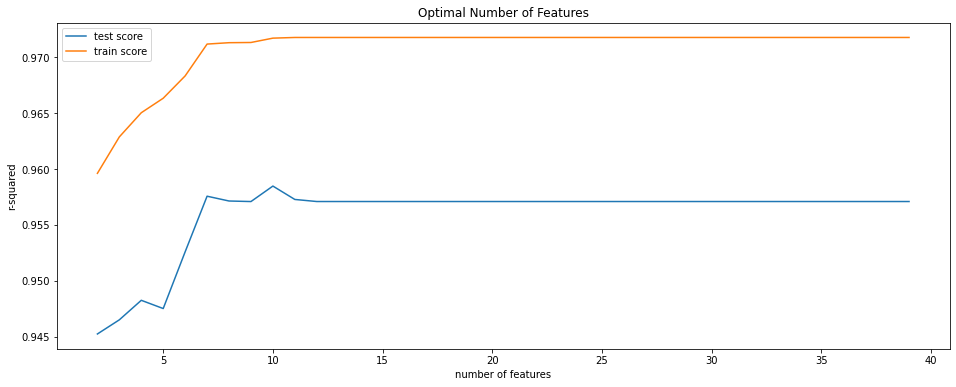

In [33]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [34]:
from sklearn.metrics import r2_score

From the above plot, we can say that for 10 features we get an stable result. therefore the optimal n-features values we will consider is 10 .

we further fit the linear regression model with optimal featured and calculate the r2 score from cross validation.

In [35]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict damage of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Linear Regression with Cross Validation R-Squared:", r2)

Linear Regression with Cross Validation R-Squared: 0.9169217377781882


In [37]:
## linear regression model without cross validation

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print("Linear Regression R-squared: {}".format(
    lin_reg_model.score(X_test, y_test)))


Linear Regression R-squared: 0.9169217377781882


-----

Understanding Predicted vs Actual values.

In [38]:
X_test.head()

,T_sec,OperatorFactor,Temperature,Flight_Phase_FlightPhaseEnum.climb,Flight_Phase_FlightPhaseEnum.cruise,Flight_Phase_FlightPhaseEnum.takeoff,Flight_Phase_FlightPhaseEnum.taxiout,Engine_Serial_Number_11101,Engine_Serial_Number_11102,Engine_Serial_Number_11103,Engine_Serial_Number_11104,Engine_Serial_Number_11105
0,-0.314785,-0.885316,0.427347,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,2.019139,-0.542326,-0.471405
1,0.442654,1.129541,-0.039002,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,1.843909,-0.471405
2,-0.450042,-0.885316,-0.317755,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,-0.542326,2.121320
3,0.975259,1.129541,-0.056409,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,1.843909,-0.471405
4,0.241586,-0.885316,-0.951368,1.095445,-0.344447,-0.707107,-0.344447,-0.471405,-0.518875,-0.495261,-0.542326,2.121320


In [39]:
y_pred = lin_reg_model.predict(X_test)

y_pred

array([0.00350631, 0.0034557 , 0.00293555, 0.00348716, 0.00264614,
       0.0029559 , 0.00273955, 0.00339859, 0.00359241, 0.00269047,
       0.00305344, 0.00366138, 0.00284725, 0.00269759, 0.00409966,
       0.00183172, 0.00468356, 0.00377861, 0.00351489, 0.00305446,
       0.0023201 , 0.00295278, 0.00264962, 0.00320147, 0.00257801,
       0.00347403, 0.00190421, 0.00305319, 0.00290068])

In [41]:
# Error from the prediction 
print(y_pred.shape)
print(y_test.shape)
error = (y_pred*10000) - (y_test*10000)
error.head(10)

(29,)
(29,)


47   -0.662008
63   -1.749650
83    0.356863
69   -1.435046
88   -2.537242
16    3.065865
18    0.902380
45   -1.739219
37    3.001442
17    0.411553
Name: Damage_Calculated, dtype: float64

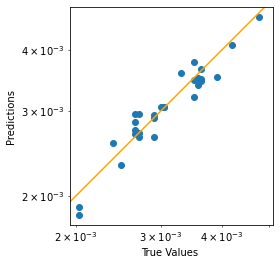

In [42]:
# Plotting Actual (True) vs Predicted values 
g = plt.scatter(y_test, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

plt.plot([0, 1], [0, 1], c='orange', label='45° line')


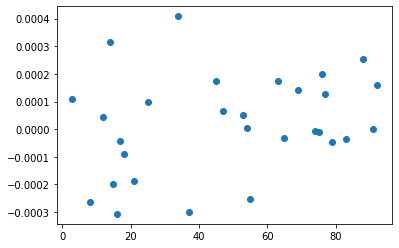

In [44]:
# Actual - predicted
g = plt.plot(y_test - y_pred, marker='o', linestyle='')

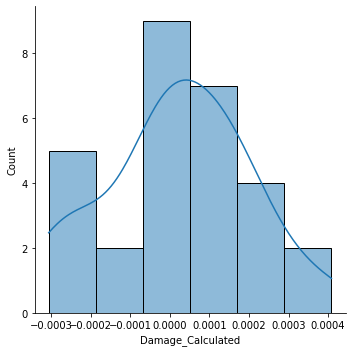

In [45]:
# Distribution of predicted values

sns.displot(y_test-y_pred, kde=True)


_____